# **Problem Statement 3**

Build FeedForward neural networkds with Keras and Tensorflow for classification of CIFAR10 image dataset using the following steps



```
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture
d. Train the model using SGD/Adam optimizer
e. Evaluate the network
f. Plot the training loss and accuracy
```



## **Import the necessary packages**

In [36]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

## **Load training and Testing Data**

In [37]:
((X_train, Y_train), (X_test, Y_test)) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [38]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape
# X_test.shape

(50000, 3072)

In [39]:
lb = LabelBinarizer()

Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

## **Define the network architecture using Keras**

In [41]:
model = Sequential()
model.add(Dense(64, input_shape=(3072,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Train the model using SGD / Adam optimizer**

In [42]:
epochs = 11
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [43]:
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs)

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2047 - loss: 2.0993 - val_accuracy: 0.2757 - val_loss: 1.9250
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2817 - loss: 1.9191 - val_accuracy: 0.2883 - val_loss: 1.8780
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2971 - loss: 1.8857 - val_accuracy: 0.2889 - val_loss: 1.9049
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3026 - loss: 1.8710 - val_accuracy: 0.3117 - val_loss: 1.8411
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3141 - loss: 1.8555 - val_accuracy: 0.3176 - val_loss: 1.8353
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3131 - loss: 1.8520 - val_accuracy: 0.3179 - val_loss: 1.8397
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3193 - loss: 1.8384 - val_accuracy: 0.3174 - val_loss: 1.8397
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3233 - loss: 1.8308 

## **Evaluate the network**

In [44]:
predictions = model.predict(X_test)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = [str(x) for x in lb.classes_]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.38      0.33      0.35      1000
           1       0.34      0.34      0.34      1000
           2       0.16      0.01      0.02      1000
           3       0.18      0.07      0.10      1000
           4       0.34      0.17      0.23      1000
           5       0.27      0.43      0.33      1000
           6       0.31      0.49      0.38      1000
           7       0.42      0.29      0.35      1000
           8       0.29      0.58      0.39      1000
           9       0.31      0.39      0.34      1000

    accuracy                           0.31     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.30      0.31      0.28     10000



## **Plot graphs**

[]

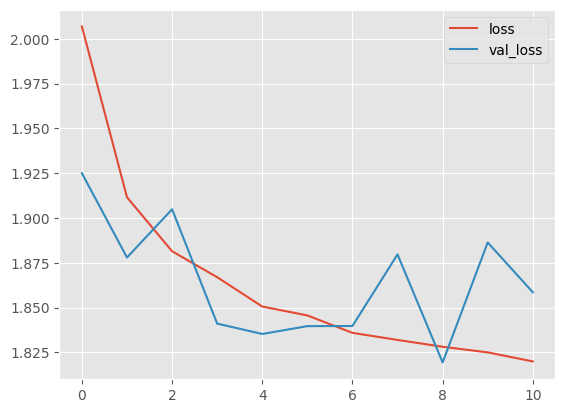

In [45]:
plt.style.use("ggplot")
plt.figure()


plt.plot(np.arange(0, epochs), H.history['loss'], label="loss")
plt.plot(np.arange(0, epochs), H.history['val_loss'], label="val_loss")

plt.legend()
plt.plot()

[]

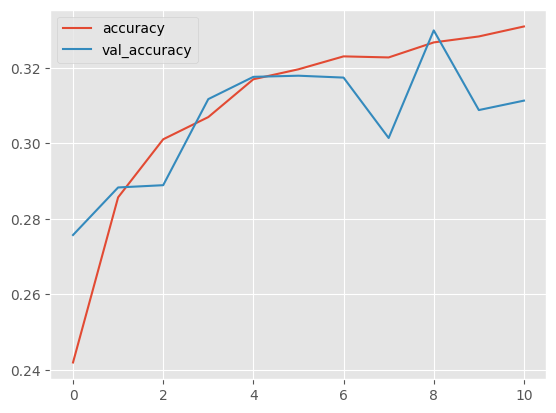

In [47]:
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.plot()